In [34]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def energy_loss_particle(particle_hits):
    r = np.hypot(particle_hits.tx, particle_hits.ty)
    idxs = np.argsort(r)
    e = particle_hits.te.to_numpy()[idxs]
    return e[0] - e[-1]
    
def energy_loss_event(event_hits, event_particles):
    return [ energy_loss_particle(hits) for pid, hits in event_hits.groupby("particle_id") if event_particles.iloc[pid].vx == 0.0 ]

In [36]:
event_particles = [ pd.read_csv(file, index_col='particle_id') for file in glob.glob("csv/event*-particles_initial.csv") ]
event_hits = [ pd.read_csv(file) for file in glob.glob("csv/event*-hits.csv") ]

In [37]:
pd.DataFrame(np.vstack([*np.unique(sum([p.particle_type.tolist() for p in event_particles], []), return_counts=True)]))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-211,-11,11,22,211,2112,2212,1000010020,1000010030,1000020040,...,1000120259,1000120260,1000130240,1000130260,1000130269,1000130270,1000140270,1000140280,1000140290,1000140300
1,4,26370,463340,595315,2,29,122,1,1,7,...,2,5,1,7,3,91,5,83,6,2


Text(0.5, 1.0, '50k 4 GeV electrons - 100 surfaces telescope')

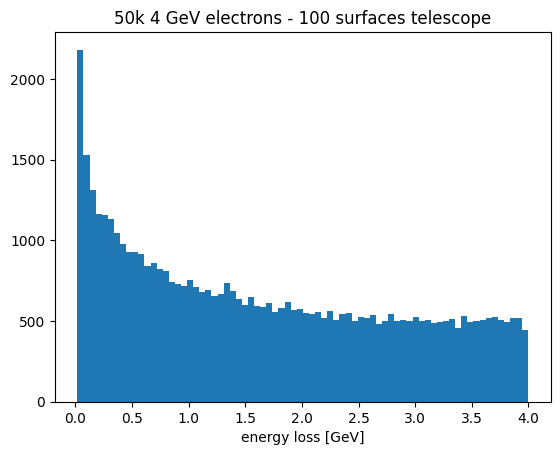

In [45]:
_ = plt.hist(sum([ energy_loss_event(hits, particles) for hits, particles in zip(event_hits, event_particles) ], []), bins='rice')
#plt.yscale('log')
plt.xlabel("energy loss [GeV]")
plt.title("50k 4 GeV electrons - 100 surfaces telescope")
#plt.yticks([1e2,1e3,1e4])

Text(0.5, 0, 'energy [GeV]')

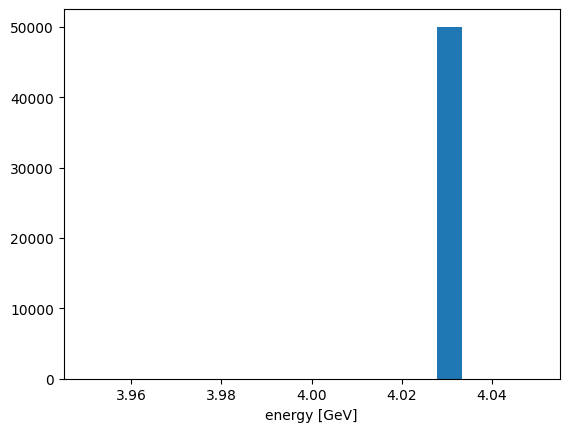

In [39]:
_ = plt.hist(sum([ [ np.sqrt(p.px**2 + p.py**2 + p.pz**2 + p.m**2) for i, p in ps.iterrows() if p.vx == 0.0 ] for ps in event_particles ], []),
             bins=np.linspace(3.95,4.05,19))
plt.xlabel("energy [GeV]")

In [40]:
np.linspace(3.95,4.05,9)

array([3.95  , 3.9625, 3.975 , 3.9875, 4.    , 4.0125, 4.025 , 4.0375,
       4.05  ])